# Data Project - Stock Market Analysis 

In this project we are looking at data from the stock market, particularly some technology stocks. 

We'll have to answer the following questions:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

#### Basic Analysis of Stock Information

In [1]:
#starting with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


from scipy import stats


import pandas_datareader.data as pdweb

# For time stamps
from datetime import datetime

In [2]:
# Uing tech stocks for analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']


for stock in tech_list:   
    # Setting DataFrame as the Stock Ticker
    globals()[stock] = pd.read_csv("data/" + stock + ".csv")
    globals()[stock].set_index(pd.DatetimeIndex(globals()[stock]["Date"]), inplace=True)
    globals()[stock].drop("Date", axis=1, inplace=True)

In [3]:
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   103.279144  104.181604  102.319700  103.268634   96.403442   
std     14.539267   14.685578   14.259951   14.445970   14.454927   
min     74.007141   74.441429   73.047142   73.994286   66.172997   
25%     93.842503   94.584999   93.119997   93.820000   87.297237   
50%    101.239998  102.154999  100.535000  101.039997   94.482918   
75%    113.535000  114.400000  112.010002  113.302499  106.409044   
max    132.940002  133.600006  131.169998  133.000000  125.401093   

             Volume  
count  2.520000e+02  
mean   5.782832e+07  
std    2.404937e+07  
min    1.447960e+07  
25%    4.266905e+07  
50%    5.325340e+07  
75%    6.799198e+07  
max    1.899779e+08

In [4]:
GOOG.describe()

Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   547.472846  551.565964  542.135900  546.975260  546.975260   
std     24.459745   23.998856   24.807727   24.370983   24.370983   
min    491.942810  493.261566  484.891632  489.854309  489.854309   
25%    528.103714  532.941619  523.620270  528.334335  528.334335   
50%    546.891662  550.690765  540.875976  545.951843  545.951843   
75%    568.496613  573.534455  563.134217  568.278366  568.278366   
max    596.708984  601.522522  589.259949  592.820374  592.820374   

             Volume  
count  2.520000e+02  
mean   1.938463e+06  
std    9.381570e+05  
min    1.475000e+05  
25%    1.383950e+06  
50%    1.703700e+06  
75%    2.206000e+06  
max    6.828200e+06

In [5]:
MSFT.describe()

Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean    43.891270   44.231310   43.526865   43.903214   40.083756   
std      2.836821    2.863737    2.817083    2.834516    2.735061   
min     39.000000   39.349998   38.509998   39.060001   35.181862   
25%     41.437499   41.762501   41.125001   41.507498   37.840289   
50%     43.674999   44.094999   43.340000   43.855000   40.095501   
75%     46.380001   46.762500   46.014998   46.417500   42.464073   
max     49.740002   50.049999   49.389999   49.610001   45.280670   

             Volume  
count  2.520000e+02  
mean   3.328167e+07  
std    1.799630e+07  
min    1.143780e+07  
25%    2.462620e+07  
50%    2.997050e+07  
75%    3.638602e+07  
max    2.025224e+08

In [6]:
AMZN.describe()

Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   327.738174  331.469008  324.029564  327.942620  327.942620   
std     25.817696   25.854254   26.290486   26.113654   26.113654   
min    284.399994  290.420013  284.000000  286.950012  286.950012   
25%    307.880013  312.372505  303.959999  307.757508  307.757508   
50%    323.979995  327.934998  319.544999  323.850007  323.850007   
75%    338.584999  341.797508  334.589989  338.730011  338.730011   
max    385.709991  389.369995  383.890015  387.829987  387.829987   

             Volume  
count  2.520000e+02  
mean   4.038763e+06  
std    2.708108e+06  
min    1.513800e+06  
25%    2.639275e+06  
50%    3.285950e+06  
75%    4.306550e+06  
max    2.385610e+07

In [7]:
# NOTE: here I return to the original notebook
# summary stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   103.279144  104.181604  102.319700  103.268634   96.403442   
std     14.539267   14.685578   14.259951   14.445970   14.454927   
min     74.007141   74.441429   73.047142   73.994286   66.172997   
25%     93.842503   94.584999   93.119997   93.820000   87.297237   
50%    101.239998  102.154999  100.535000  101.039997   94.482918   
75%    113.535000  114.400000  112.010002  113.302499  106.409044   
max    132.940002  133.600006  131.169998  133.000000  125.401093   

             Volume  
count  2.520000e+02  
mean   5.782832e+07  
std    2.404937e+07  
min    1.447960e+07  
25%    4.266905e+07  
50%    5.325340e+07  
75%    6.799198e+07  
max    1.899779e+08

In [8]:
# general info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-04-02 to 2015-04-01
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [9]:
AAPL.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2014-04-02  77.482857  77.639999  77.180000  77.507141  69.314529  45105200
2014-04-03  77.341431  77.500000  76.805717  76.970001  68.834145  40586000
2014-04-04  77.115715  77.142860  75.797142  75.974289  67.943726  68812800
2014-04-07  75.431427  75.842857  74.555717  74.781425  66.876930  72462600
2014-04-08  75.027145  75.160004  74.099998  74.777145  66.873100  60972100

In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-04-02 to 2015-04-01
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Now that we've seen the DataFrame, plotting out the volume and closing price of the stocks

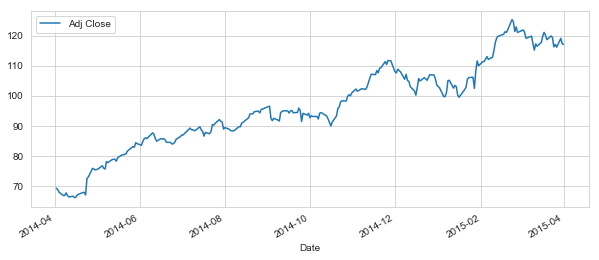

In [11]:
# historical view of the closing price
AAPL["Adj Close"].plot(legend=True, figsize=(10,4))

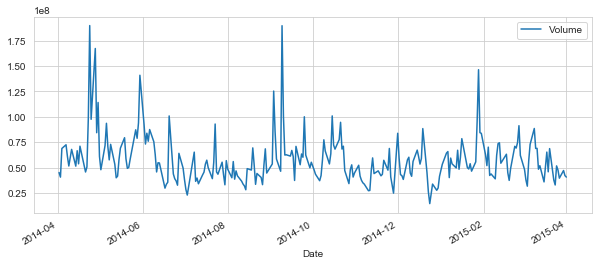

In [12]:
# plotting the total volume of the stock being traded each day
AAPL["Volume"].plot(legend=True, figsize=(10,4))

After visualizations for the closing price and the volume traded each day, I will caculate the moving average for the stock.

In [13]:
# Using pandas built-in rolling mean calculator
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" % (str(ma))
    #        AAPL[column_name] = pd.rolling_mean(AAPL["Adj Close"], ma)
    AAPL[column_name] = AAPL["Adj Close"].rolling(window=ma, center=False).mean()

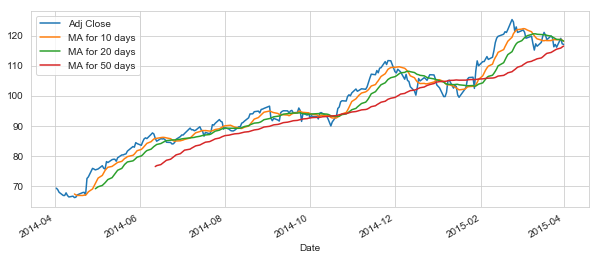

In [14]:
# plotting all the additional moving averages
AAPL[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(subplots=False, figsize=(10,4))

#### Section 2 - Daily Return Analysis

Further I have to analyze the risk of the stock. In order to do so I'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Using pandas to retrieve the daily returns for the Apple stock

In [15]:
# using the pct_change to find the percent change for each day
AAPL["Daily Return"] = AAPL["Adj Close"].pct_change()

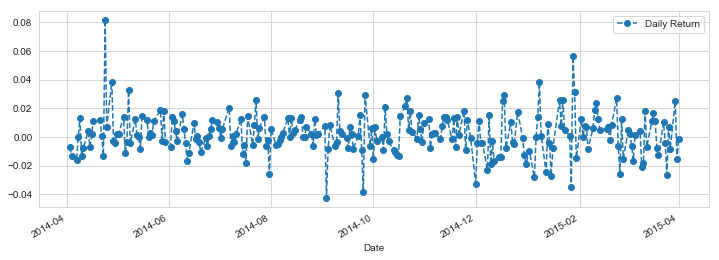

In [16]:
# plotting the daily return percentage
AAPL["Daily Return"].plot(figsize=(12,4), legend=True, linestyle="--", marker="o")

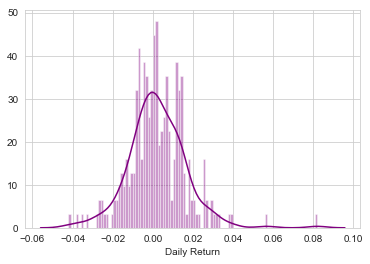

In [17]:
# using dropna here, otherwise the NaN values cannot be read by seaborn
sns.distplot(AAPL["Daily Return"].dropna(), bins=100, color="purple" )

Building a DataFrame with all the "Close" columns for each of the stocks dataframes to analyze the returns of all stocks in the list.

In [19]:
closing_df = pd.concat([AAPL, AMZN, GOOG, MSFT], keys=["AAPL", "AMZN", "GOOG", "MSFT"])["Adj Close"].unstack().T

In [20]:
closing_df.head()

AAPL        AMZN        GOOG       MSFT
Date                                                    
2014-04-02  69.314529  341.959991  563.899353  37.244499
2014-04-03  68.834145  333.619995  566.624390  36.938244
2014-04-04  67.943726  323.000000  540.169861  35.911434
2014-04-07  66.876930  317.760010  535.207153  35.848389
2014-04-08  66.873100  327.070007  551.865540  35.866398

We have all the closing so let's get the daily returns for all the stocks

In [21]:
# making a new dataframe with the returns
tech_rets = closing_df.pct_change()

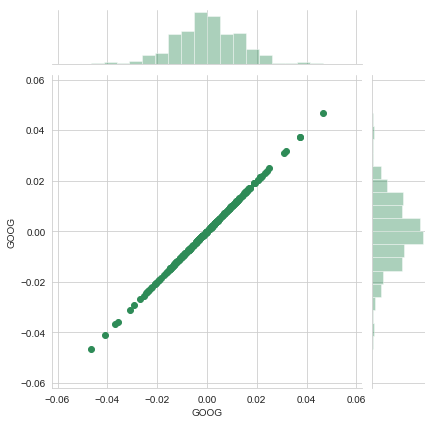

In [22]:
sns.jointplot("GOOG", "GOOG", tech_rets, kind="scatter", color="seagreen")

In [23]:
s_pearsonr, s_p = stats.pearsonr(tech_rets.GOOG.dropna(), tech_rets.GOOG.dropna())
print("pearsonr = {}, p={}".format(s_pearsonr, s_p))

pearsonr = 1.0, p=0.0


We can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. Now we can compare Google and Microsoft the same way.

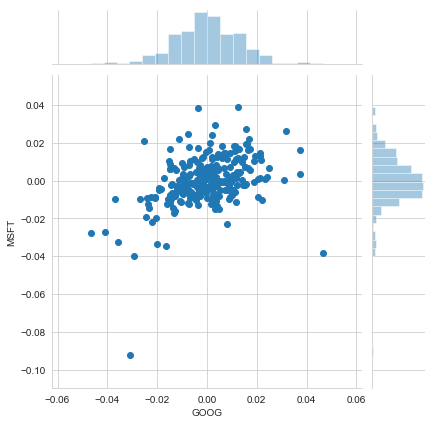

In [24]:
# comparing Google and Microsoft daily returns
sns.jointplot("GOOG", "MSFT", tech_rets, kind="scatter")

In [25]:
s_pearsonr, s_p = stats.pearsonr(tech_rets.GOOG.dropna(), tech_rets.MSFT.dropna())
print("pearsonr = {}, p={}".format(s_pearsonr, s_p))

pearsonr = 0.41961604953399795, p=3.986973313976517e-12


In [26]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

<IPython.core.display.SVG object>

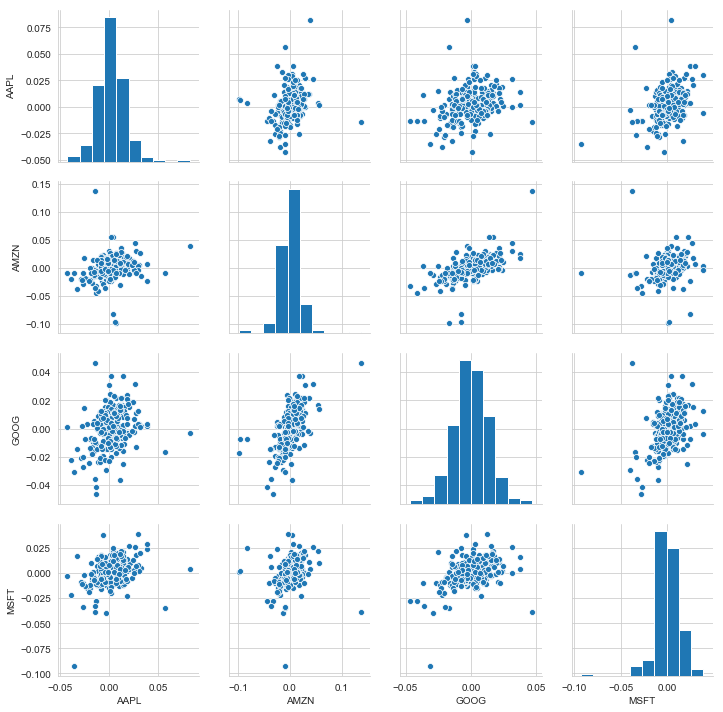

In [27]:
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks.

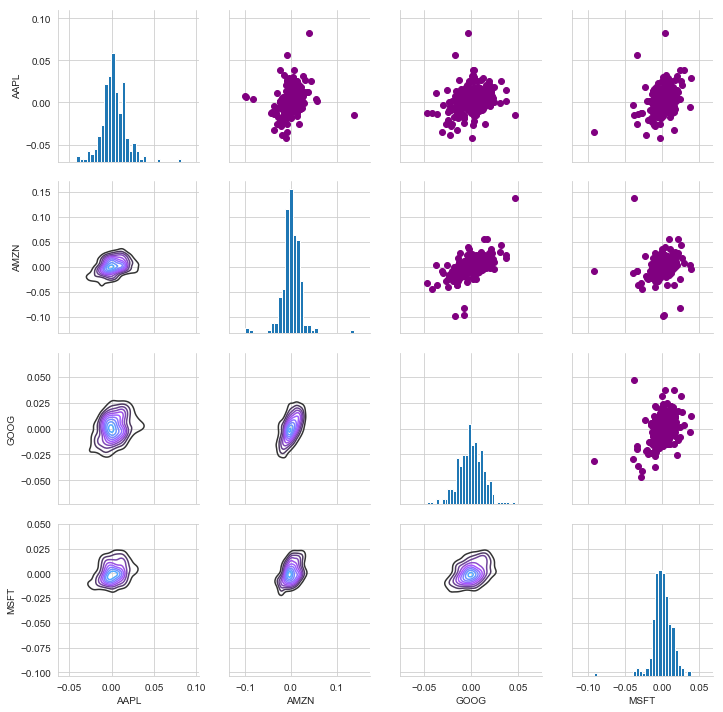

In [28]:
returns_fig = sns.PairGrid(tech_rets.dropna())

# using map_upper specify what upper triangle will look like
returns_fig.map_upper(plt.scatter, color = "purple")

# defining the lower triangle in the figure
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")

# defining the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

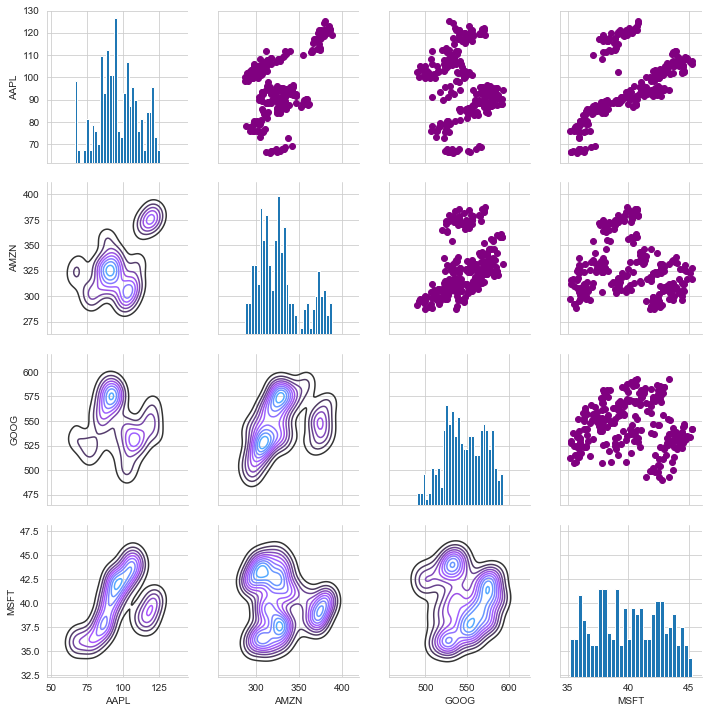

In [29]:
# we are setting up our figure by giving it a name and call PairPlot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# using map_upper we specify what upper triangle will look like
returns_fig.map_upper(plt.scatter, color = "purple")

# we define the lower triangle in the figure, including the plot type (kde) or teh color marp (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")

# finally, we define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

 By comparing the closing prices between Microsoft and Apple.

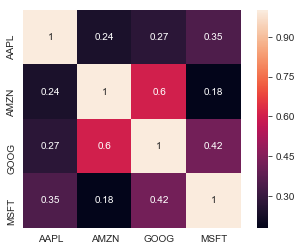

In [30]:
sns.heatmap(tech_rets.dropna().corr(), annot=True, square=True)

In [31]:
tech_rets_corr = tech_rets.dropna().corr()
mask_upper = np.zeros_like(tech_rets_corr, dtype=np.bool)
mask_upper[np.triu_indices_from(mask_upper)] = True

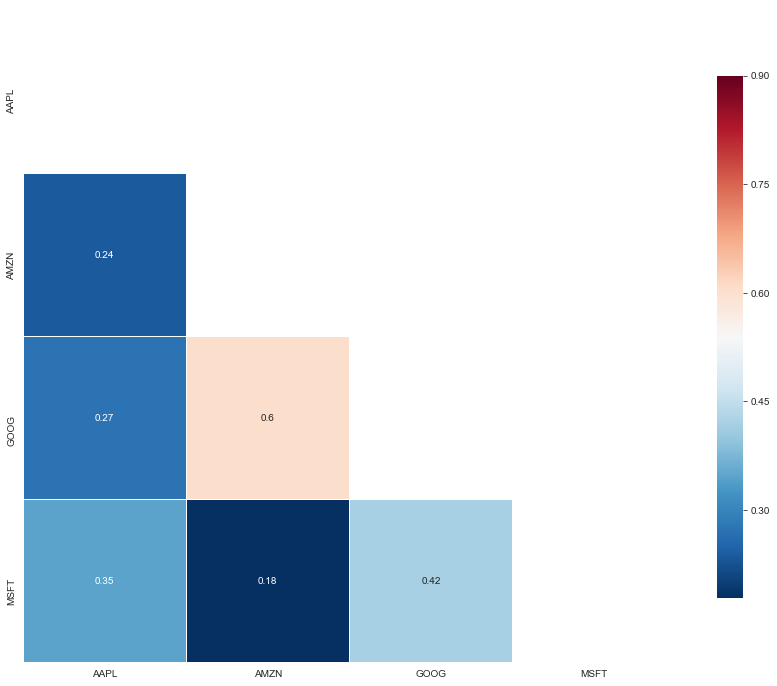

In [32]:
plt.subplots(figsize = (15,12))
sns.heatmap(tech_rets_corr, 
            annot=True,
            mask = mask_upper,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True, cbar_kws={"shrink": .8})

Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

#### Risk Analysis

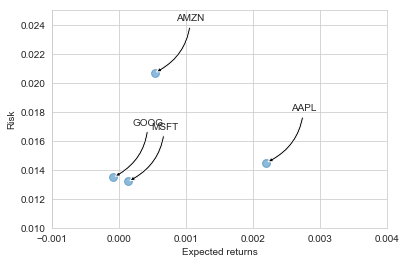

In [33]:
# defining a new DataFrame as a cleaned version of the original tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.scatter(rets.mean(), rets.std(), alpha = 0.5, s = area)

# set the x and y limits of the plot (optional, remove this if you don't see anything on your plot)
plt.ylim([0.01, 0.025])
plt.xlim([-0.001, 0.004])

# set the plot axis titles
plt.xlabel("Expected returns")
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = "offset pixels",
        horizontalalignment="right", verticalalignment="bottom",
        arrowprops = dict(facecolor="black", arrowstyle = "simple", connectionstyle = 'arc3,rad=-0.3'))

#### Value at Risk

we have to define a value at risk parameter for our stocks. 

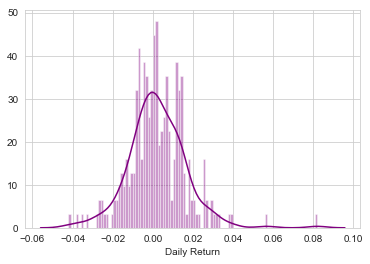

In [34]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL["Daily Return"].dropna(), bins = 100, color="purple")

we can use the quantile to get the risk value for the stock

In [35]:
# The 0.05 empirical quantile of daily returns
rets["AAPL"].quantile(0.05)

-0.01901692544903283

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

In [36]:
GOOG["Daily Return"] = GOOG["Adj Close"].pct_change()
MSFT["Daily Return"] = MSFT["Adj Close"].pct_change()
AMZN["Daily Return"] = AMZN["Adj Close"].pct_change()

Now, draw for Google, Microsft and Amazon stocks

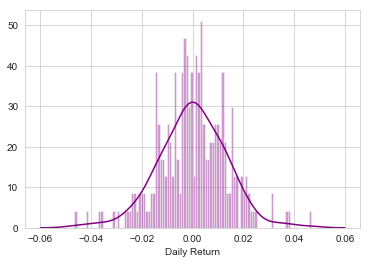

In [37]:
sns.distplot(GOOG["Daily Return"].dropna(), bins = 100, color="purple")

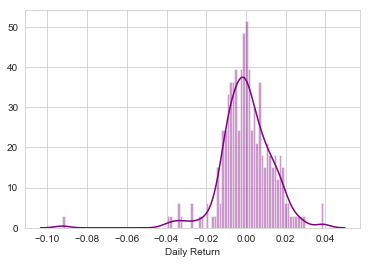

In [38]:
sns.distplot(MSFT["Daily Return"].dropna(), bins = 100, color="purple")

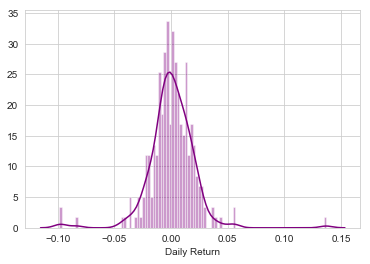

In [39]:
sns.distplot(AMZN["Daily Return"].dropna(), bins = 100, color="purple")

Now, quantiles for Google, Microsft and Amazon stocks

In [40]:
rets["GOOG"].quantile(0.05)

-0.022208392998220472

In [41]:
rets["MSFT"].quantile(0.05)

-0.01665120621634608

In [42]:
rets["AMZN"].quantile(0.05)

-0.026051813180182515

#### Value at Risk using the Monte Carlo method

In [43]:
# setting up time horizon
days = 365

# now, delta
dt = 1/days

# Taking our mu (drift) from the expected return data we got from AAPL
mu = rets.mean()["GOOG"]

# Taking volatility of the stock from the std() of the average return
sigma = rets.std()["GOOG"]

In [44]:
def stock_monte_carlo(start_price, days, dt, mu, sigma):
    """ This function takes in starting stock price, days of simulation, delta, mu, sigma, and returns a simulated price array """
    
    # define a price array
    price = np.zeros(days)
    price[0] = start_price
    # shock and drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # run the price array for the number of days
    for x in range(1, days):
        # calculate shock
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        # calculate drift
        drift[x] = mu * dt
        # calculate price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [45]:
GOOG.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-04-02  596.708984  601.522522  559.115662  563.899353  563.899353   
2014-04-03  566.733765  584.068481  561.045044  566.624390  566.624390   
2014-04-04  571.507568  574.610474  540.030640  540.169861  540.169861   
2014-04-07  537.782959  545.480652  524.267273  535.207153  535.207153   
2014-04-08  539.632813  551.965027  538.648193  551.865540  551.865540   

             Volume  Daily Return  
Date                               
2014-04-02   147500           NaN  
2014-04-03  5113100      0.004832  
2014-04-04  6386800     -0.046688  
2014-04-07  4413700     -0.009187  
2014-04-08  3159900      0.031125

Text(0.5,1,'Monte Carlo Analysis for Google')

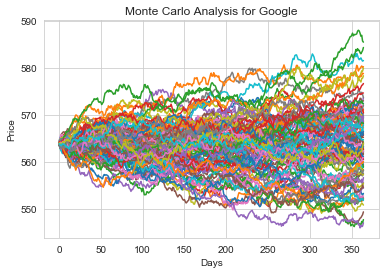

In [46]:
# The close of the first day for Google

start_price = GOOG["Adj Close"][0]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, dt, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for Google")

Creating a histogram of the end results for a much larger run. 

In [47]:
# setting a latge number of runs
runs = 10000

# created an empty matrix to hold the end price data
simulations = np.zeros(runs)

# setting the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):
    # setting the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price, days, dt, mu, sigma)[days-1]

We have our array of simulations, I can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

Text(0.5,1,'Final price distribution for Google Stock after 365 days')

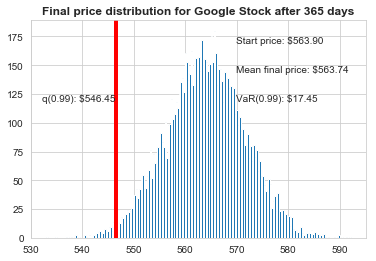

In [48]:
#  defined q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# plotting the distribution of the end prices
plt.hist(simulations, bins=200)


# Starting price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" % start_price)
# mean ending price
plt.figtext(0.6, 0.7, s="Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% conficence interval)
plt.figtext(0.6, 0.6, s="VaR(0.99): $%.2f" % (start_price - q))

# Displaying 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % (q))

# Plotting a line at the 1% quantile result
plt.axvline(x = q, linewidth = 4, color = "r")

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight = "bold")

we can conclude that at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $18.38 for every investment of 569.85 (the price of one inital google stock).

For every initial stock you purchase your putting about $18.38 at risk 99% of the time from our Monte Carlo Simulation.